In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import rasterio as rio
import seaborn as sns
import statsmodels.graphics.api as smg
import warnings
warnings.filterwarnings("ignore")

Forma:  (246, 347)
Valores únicos:  [1]


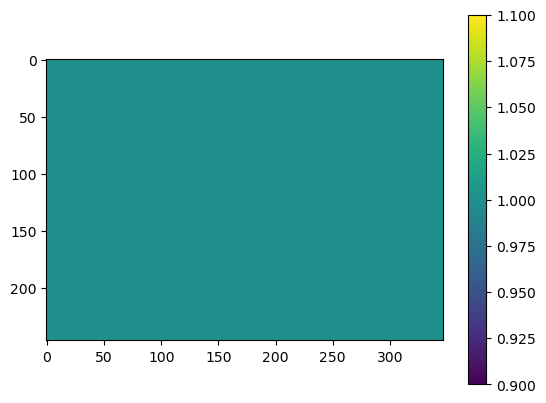

In [2]:
raster = rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\IMM.tif")
inventario=raster.read(1)
inventario=np.where(inventario == 65535,0,1)
plt.imshow(inventario)
plt.colorbar();

print('Forma: ', inventario.shape)
print('Valores únicos: ', np.unique(inventario))

In [3]:
print('Valores originales únicos:', np.unique(inventario))

Valores originales únicos: [1]


Forma: (246, 347)
Valores únicos: [0 1]
Valor NoData: None


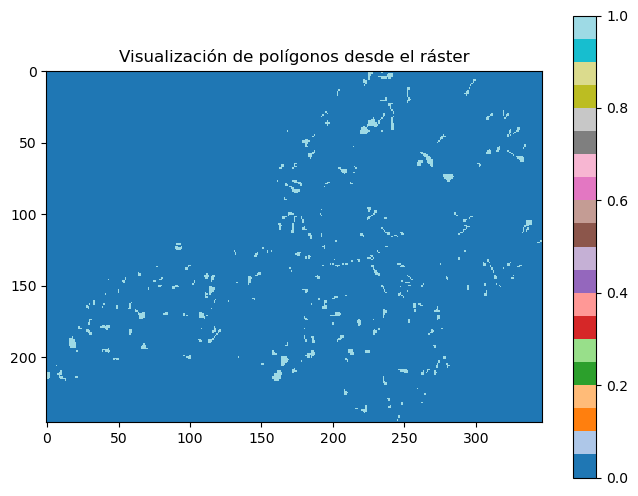

In [4]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Cargar el ráster
ruta = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\IMM.tif"

with rio.open(ruta) as src:
    inventario = src.read(1)
    nodata = src.nodata

print("Forma:", inventario.shape)
print("Valores únicos:", np.unique(inventario))
print("Valor NoData:", nodata)

# Aplicar máscara si hay NoData
if nodata is not None:
    inventario = np.where(inventario == nodata, np.nan, inventario)

# Visualización
plt.figure(figsize=(8, 6))
plt.imshow(inventario, cmap='tab20', interpolation='none')
plt.colorbar()
plt.title('Visualización de polígonos desde el ráster')
plt.show()


Valor NoData: None


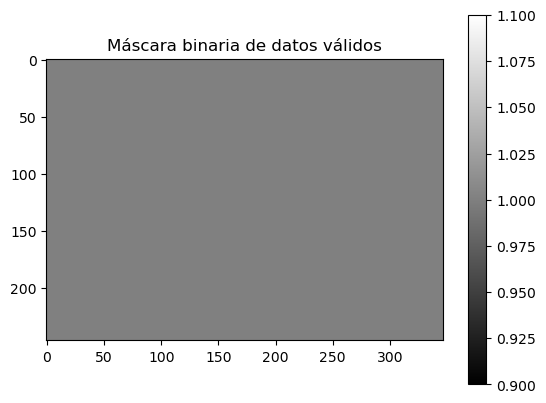

In [5]:
nodata = raster.nodata
print('Valor NoData:', nodata)

# Máscara binaria: 1 donde hay datos válidos, 0 donde hay NoData
mascara = np.where(inventario == nodata, 0, 1)

plt.imshow(mascara, cmap='gray')
plt.title('Máscara binaria de datos válidos')
plt.colorbar()


Forma:  (538, 796)
Valores únicos:  [1.]


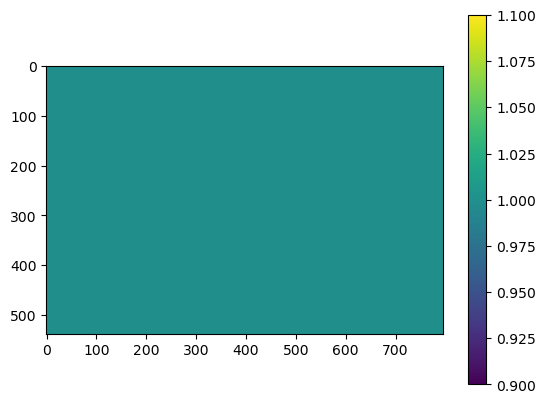

In [6]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Giancarlo\Taller_3\Map.tif')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,1)
plt.imshow(msk)
plt.colorbar();

print('Forma: ', msk.shape)
print('Valores únicos: ', np.unique(msk))

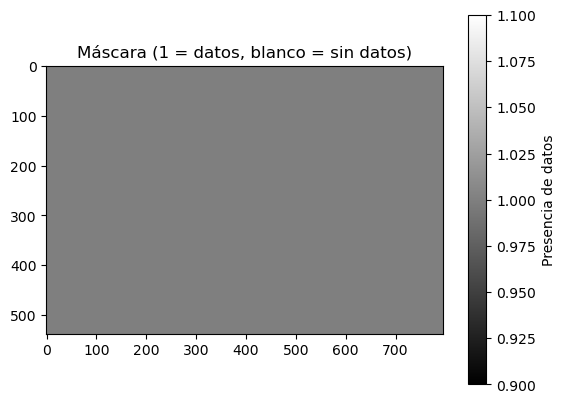

In [7]:
plt.imshow(msk, cmap='gray')
plt.title("Máscara (1 = datos, blanco = sin datos)")
plt.colorbar(label='Presencia de datos')
plt.show()

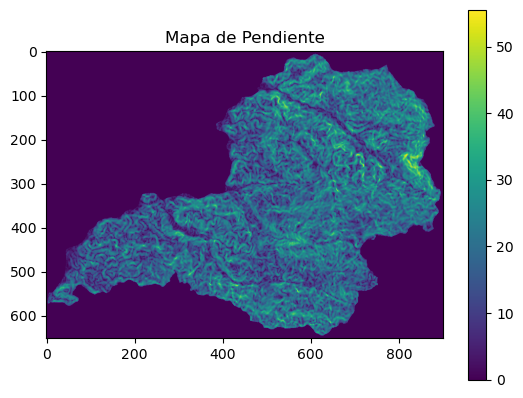

In [8]:
import rasterio as rio
import matplotlib.pyplot as plt

raster = rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif")
pendiente = raster.read(1)

plt.imshow(pendiente, cmap='viridis')
plt.colorbar()
plt.title("Mapa de Pendiente")
plt.show()

In [9]:
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\IMM.tif") as src_inv:
    print("CRS del inventario:", src_inv.crs)

CRS del inventario: ESRI:103599


In [10]:
with rio.open(r'C:\Users\Santi-PC\Desktop\Giancarlo\Taller_3\Map.tif') as src_ref:
    ref_shape = src_ref.read(1).shape
    ref_transform = src_ref.transform
    ref_crs = src_ref.crs

    if ref_crs is None:
        with rio.open(r'C:\Users\Santi-PC\Documents\ArcGIS\Projects\MyProject4\IMM__PolygonToRaster_3.tif') as src_inv:
            ref_crs = src_inv.crs  # Usa el mismo CRS del inventario

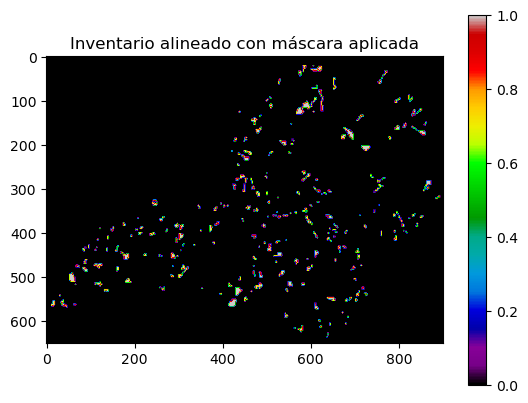

In [11]:
import numpy as np
import rasterio as rio
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt

# Abrir ráster de referencia (pendiente)
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif") as src_ref:
    ref_shape = src_ref.read(1).shape
    ref_transform = src_ref.transform
    ref_crs = src_ref.crs
    msk = src_ref.read_masks(1)
    msk = np.where(msk == 0, np.nan, 1)

# Abrir ráster a alinear (inventario)
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\IMM.tif") as src_inv:
    inventario = src_inv.read(1)
    aligned_inv = np.empty(ref_shape, dtype=inventario.dtype)

    reproject(
        source=inventario,
        destination=aligned_inv,
        src_transform=src_inv.transform,
        src_crs=src_inv.crs,
        dst_transform=ref_transform,
        dst_crs=ref_crs,
        resampling=Resampling.nearest
    )

# Aplicar la máscara
inventario1 = aligned_inv * msk

# Visualizar
plt.imshow(inventario1, cmap='nipy_spectral')
plt.colorbar()
plt.title("Inventario alineado con máscara aplicada")
plt.show()


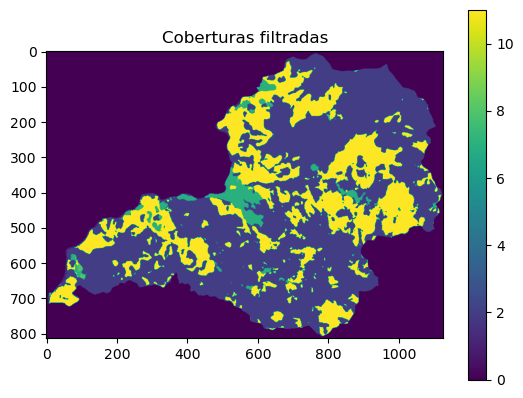

(813, 1126)
(915438,)


In [12]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Abrir el archivo raster
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\Cober.tif") as rastercoberturas:
    coberturas = rastercoberturas.read(1)

# Reemplazar valores mayores a 100 por NaN
coberturas = np.where(coberturas > 100, np.nan, coberturas)

# Aplanar la matriz y filtrar los NaN
coberturas_vector = coberturas.ravel()
coberturas_vector_MenM = coberturas_vector[~np.isnan(coberturas_vector)]

# Mostrar el mapa y resultados
plt.imshow(coberturas, cmap='viridis')
plt.colorbar()
plt.title("Coberturas filtradas")
plt.show()

# Imprimir las dimensiones
print(coberturas.shape)
print(coberturas_vector_MenM.shape)

Forma: (246, 347)
Valores únicos: [ 0  1  2  4  5  7  8 10 11]
Valor NoData: None


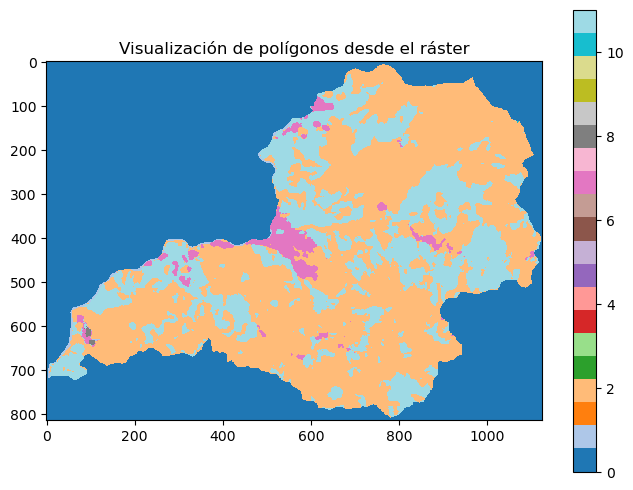

In [13]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Cargar el ráster
ruta = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\Cober.tif"

with rio.open(ruta) as src:
    cober = src.read(1)
    nodata = src.nodata

print("Forma:", inventario.shape)
print("Valores únicos:", np.unique(cober))
print("Valor NoData:", nodata)

# Aplicar máscara si hay NoData
if nodata is not None:
    cober = np.where(cober == nodata, np.nan, cober)

# Visualización
plt.figure(figsize=(8, 6))
plt.imshow(cober, cmap='tab20', interpolation='none')
plt.colorbar()
plt.title('Visualización de polígonos desde el ráster')
plt.show()

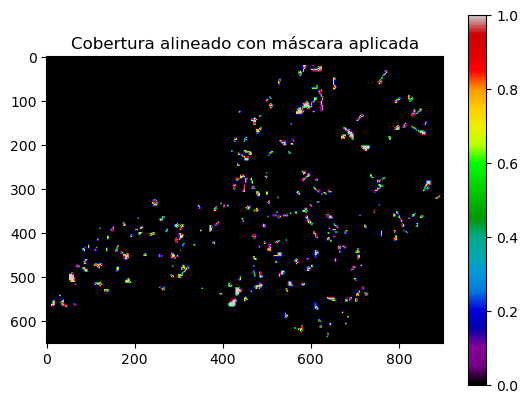

In [14]:
import numpy as np
import rasterio as rio
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt

# Abrir ráster de referencia (pendiente)
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif") as src_ref:
    ref_shape = src_ref.read(1).shape
    ref_transform = src_ref.transform
    ref_crs = src_ref.crs
    msk = src_ref.read_masks(1)
    msk = np.where(msk == 0, np.nan, 1)

# Abrir ráster a alinear
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\Cober.tif") as src_inv:
    coberturas = src_inv.read(1)
    aligned_inv = np.empty(ref_shape, dtype=inventario.dtype)

    reproject(
        source=coberturas,
        destination=aligned_inv,
        src_transform=src_inv.transform,
        src_crs=src_inv.crs,
        dst_transform=ref_transform,
        dst_crs=ref_crs,
        resampling=Resampling.nearest
    )

# Aplicar la máscara
Cobertura1 = aligned_inv * msk

# Visualizar
plt.imshow(inventario1, cmap='nipy_spectral')
plt.colorbar()
plt.title("Cobertura alineado con máscara aplicada")
plt.show()

In [15]:
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\Cober.tif") as src_cober:
    coberturas = src_cober.read(1)
    aligned_cober = np.empty(ref_shape, dtype=coberturas.dtype)

    reproject(
        source=coberturas,
        destination=aligned_cober,
        src_transform=src_cober.transform,
        src_crs=src_cober.crs,
        dst_transform=ref_transform,
        dst_crs=ref_crs,
        resampling=Resampling.nearest
    )

coberturas1 = aligned_cober * msk


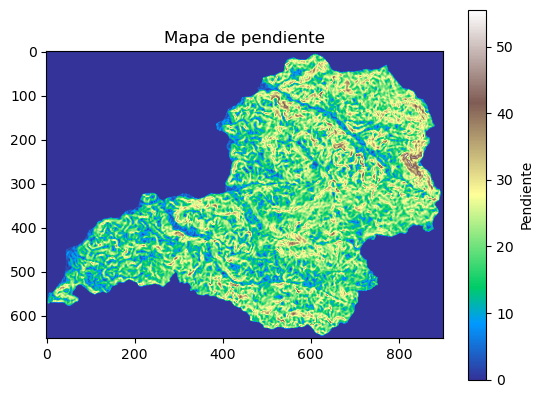

In [16]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Abrir el ráster
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif") as raster:
    slope = raster.read(1).astype(float)  # leer la banda 1 y convertir a float para poder tener NaNs

# Reemplazar valores negativos con NaN
slope = np.where(slope < 0, np.nan, slope)

# Visualizar
plt.imshow(slope, cmap='terrain')
plt.colorbar(label='Pendiente')
plt.title("Mapa de pendiente")
plt.show()

(813, 1126)


(915438,)

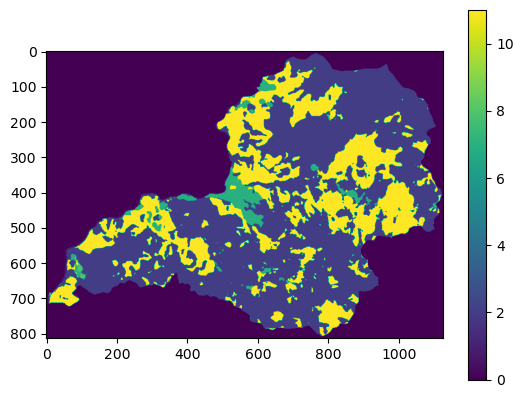

In [17]:
rastercoberturas=rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\Cober.tif')
coberturas=rastercoberturas.read(1)
coberturas=np.where(coberturas>=100,np.nan,coberturas)
coberturas_vector=coberturas.ravel()
coberturas_vector_MenM=coberturas_vector[~np.isnan(coberturas_vector)]
plt.imshow(coberturas)
plt.colorbar();
print(coberturas.shape)
coberturas_vector_MenM.shape

Forma:  (651, 901)
Valores únicos:  [  0.          0.5672656   0.5787248 ... 359.45435   359.47437
         nan]


numpy.ndarray

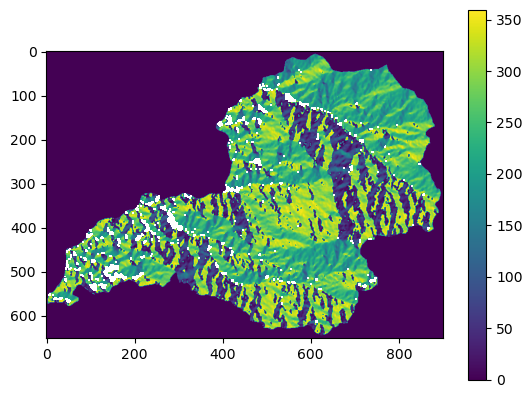

In [18]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Aspect_Fill_1.tif')
aspecto=raster.read(1)
#aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto=np.where(aspecto == aspecto.min(), np.nan, aspecto)
plt.imshow(aspecto)
plt.colorbar()

print('Forma: ', aspecto.shape)
print('Valores únicos: ', np.unique(aspecto))
type(aspecto)

Forma:  (651, 901)
Valores únicos:  [  0.           0.56726563   0.5787248  ... 359.4543457  359.47436523
          nan]


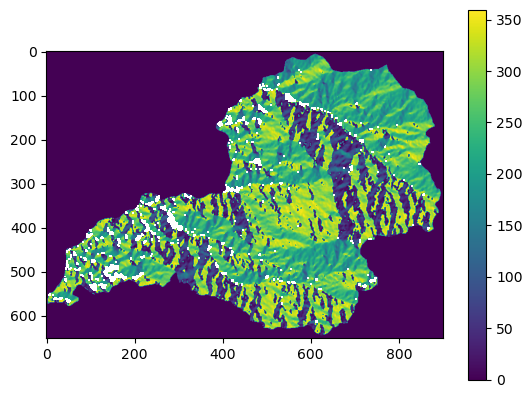

In [19]:
aspecto1 = msk*aspecto
plt.imshow(aspecto1)
plt.colorbar();

print('Forma: ', aspecto1.shape)
print('Valores únicos: ', np.unique(aspecto1))

Forma:  (651, 901)
Valores únicos:  [-5.232941  -4.896     -4.727918  ...  5.578868   5.8924136        nan]


numpy.ndarray

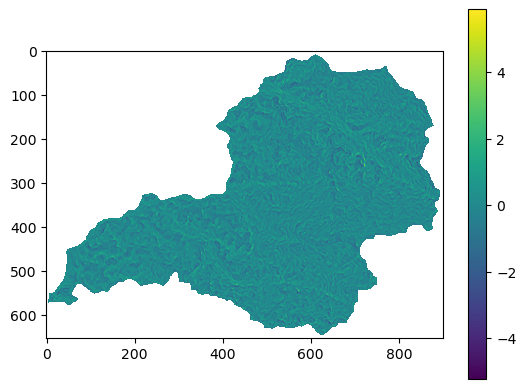

In [20]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Curva_ver.tif')
curvatura=raster.read(1)
curvatura=np.where(curvatura == curvatura.min(), np.nan, curvatura)
plt.imshow(curvatura)
plt.colorbar()

print('Forma: ', curvatura.shape)
print('Valores únicos: ', np.unique(curvatura))
type(curvatura)

Forma:  (651, 901)
Valores únicos:  [-5.23294115 -4.89599991 -4.72791815 ...  5.57886791  5.89241362
         nan]


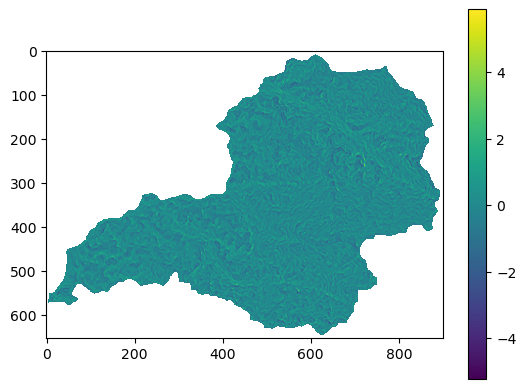

In [21]:
curvatura1 = msk*curvatura
plt.imshow(curvatura1)
plt.colorbar();

print('Forma: ', curvatura1.shape)
print('Valores únicos: ', np.unique(curvatura1))

(298006,)

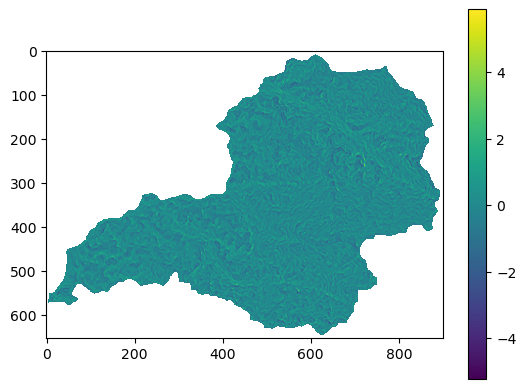

In [22]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Curva_ver.tif')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-16.64,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
curvatura.shape
curvatura_vector_MenM.shape

Forma:  (651, 901)
Valores únicos:  [-5.5015383 -5.12      -4.947027  ...  5.195294   5.615059         nan]


numpy.ndarray

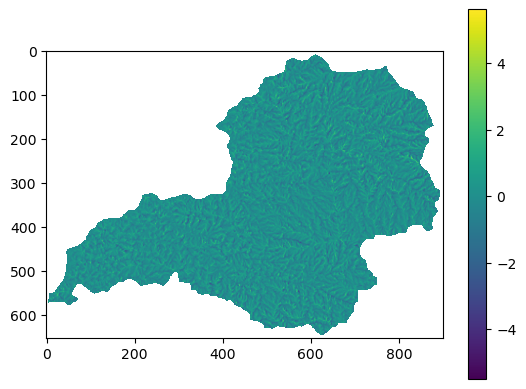

In [23]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Curva_hor.tif')
curvaturah=raster.read(1)
curvaturah=np.where(curvaturah == curvaturah.min(), np.nan, curvaturah)
plt.imshow(curvaturah)
plt.colorbar()

print('Forma: ', curvaturah.shape)
print('Valores únicos: ', np.unique(curvaturah))
type(curvaturah)

Forma:  (651, 901)
Valores únicos:  [-5.50153828 -5.11999989 -4.94702721 ...  5.1952939   5.6150589
         nan]


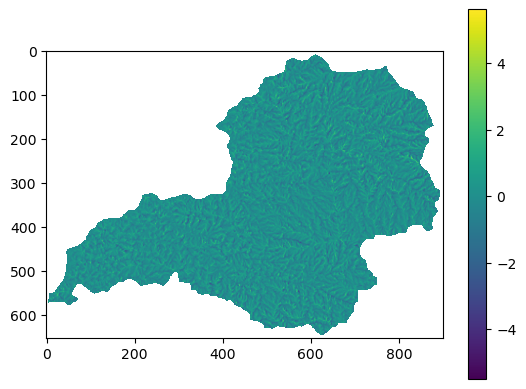

In [24]:
curvatura2 = msk*curvaturah
plt.imshow(curvatura2)
plt.colorbar();

print('Forma: ', curvatura2.shape)
print('Valores únicos: ', np.unique(curvatura2))

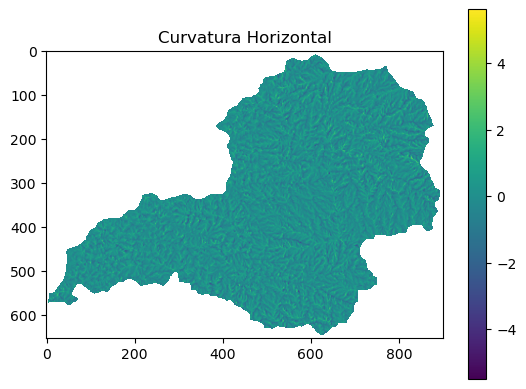

Forma del raster: (651, 901)
Cantidad de valores válidos: (298006,)


In [25]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Abrir el archivo raster de curvatura horizontal
raster_horiz = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Curva_hor.tif')
curvatura_horiz = raster_horiz.read(1)

# Reemplazar valores extremos por NaN si es necesario (ajusta el umbral si sabes cuál usar)
curvatura_horiz = np.where(curvatura_horiz < -16.64, np.nan, curvatura_horiz)

# Aplanar la matriz y eliminar NaNs
curvatura_horiz_vector = curvatura_horiz.ravel()
curvatura_horiz_vector_MenM = curvatura_horiz_vector[~np.isnan(curvatura_horiz_vector)]

# Mostrar el mapa de curvatura horizontal
plt.imshow(curvatura_horiz)
plt.colorbar()
plt.title("Curvatura Horizontal")
plt.show()

# Ver formas de los arrays
print("Forma del raster:", curvatura_horiz.shape)
print("Cantidad de valores válidos:", curvatura_horiz_vector_MenM.shape)


(586551,)

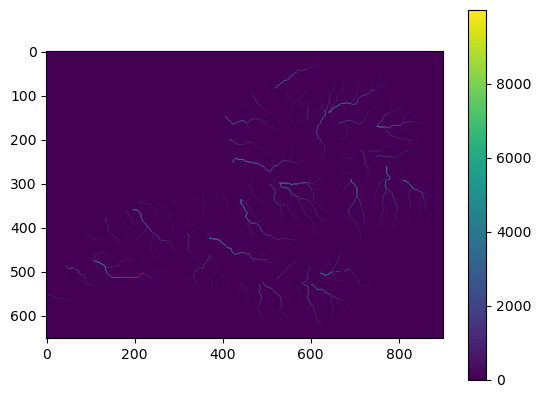

In [26]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\flowac_raste.tif')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape

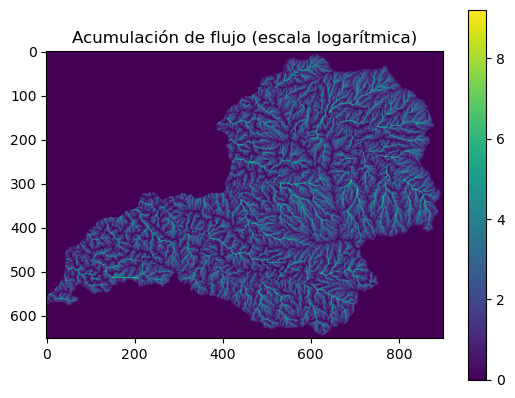

In [27]:
flujo_log = np.log1p(flujo)  # log(1 + x) evita problemas con 0
plt.imshow(flujo_log, cmap='viridis')
plt.colorbar()
plt.title("Acumulación de flujo (escala logarítmica)")
plt.show()

Forma:  (651, 901)
Valores únicos:  [0.         0.69314718 1.09861231 ... 9.20913982 9.20974064 9.21024036]


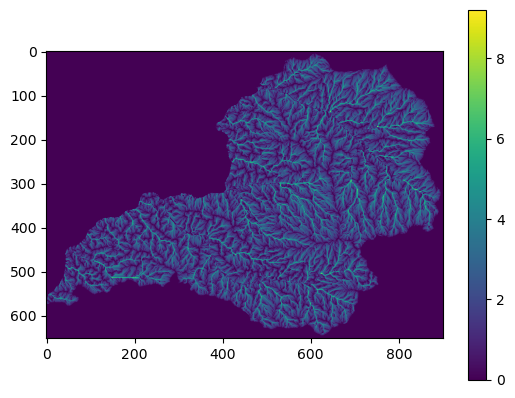

In [28]:
flujo1 = msk*flujo_log
plt.imshow(flujo1)
plt.colorbar();

print('Forma: ', flujo1.shape)
print('Valores únicos: ', np.unique(flujo1))

Forma:  (651, 901)
Valores únicos:  [1033. 1034. 1035. 1036. 1037. 1038. 1039. 1040. 1041. 1042. 1043. 1044.
 1045. 1046. 1047. 1048. 1049. 1050. 1051. 1052. 1053. 1054. 1055. 1056.
 1057. 1058. 1059. 1060. 1061. 1062. 1063. 1064. 1065. 1066. 1067. 1068.
 1069. 1070. 1071. 1072. 1073. 1074. 1075. 1076. 1077. 1078. 1079. 1080.
 1081. 1082. 1083. 1084. 1085. 1086. 1087. 1088. 1089. 1090. 1091. 1092.
 1093. 1094. 1095. 1096. 1097. 1098. 1099. 1100. 1101. 1102. 1103. 1104.
 1105. 1106. 1107. 1108. 1109. 1110. 1111. 1112. 1113. 1114. 1115. 1116.
 1117. 1118. 1119. 1120. 1121. 1122. 1123. 1124. 1125. 1126. 1127. 1128.
 1129. 1130. 1131. 1132. 1133. 1134. 1135. 1136. 1137. 1138. 1139. 1140.
 1141. 1142. 1143. 1144. 1145. 1146. 1147. 1148. 1149. 1150. 1151. 1152.
 1153. 1154. 1155. 1156. 1157. 1158. 1159. 1160. 1161. 1162. 1163. 1164.
 1165. 1166. 1167. 1168. 1169. 1170. 1171. 1172. 1173. 1174. 1175. 1176.
 1177. 1178. 1179. 1180. 1181. 1182. 1183. 1184. 1185. 1186. 1187. 1188.
 1189. 1190. 11

numpy.ndarray

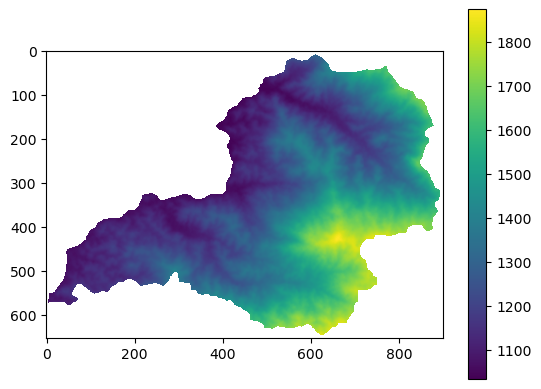

In [29]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\DEM.tif')
elevacion=raster.read(1)
elevacion=np.where(elevacion==0,np.nan,elevacion)
plt.imshow(elevacion)
plt.colorbar();

print('Forma: ', elevacion.shape)
print('Valores únicos: ', np.unique(elevacion))
type(elevacion)

Forma:  (651, 901)
Valores únicos:  [1033. 1034. 1035. 1036. 1037. 1038. 1039. 1040. 1041. 1042. 1043. 1044.
 1045. 1046. 1047. 1048. 1049. 1050. 1051. 1052. 1053. 1054. 1055. 1056.
 1057. 1058. 1059. 1060. 1061. 1062. 1063. 1064. 1065. 1066. 1067. 1068.
 1069. 1070. 1071. 1072. 1073. 1074. 1075. 1076. 1077. 1078. 1079. 1080.
 1081. 1082. 1083. 1084. 1085. 1086. 1087. 1088. 1089. 1090. 1091. 1092.
 1093. 1094. 1095. 1096. 1097. 1098. 1099. 1100. 1101. 1102. 1103. 1104.
 1105. 1106. 1107. 1108. 1109. 1110. 1111. 1112. 1113. 1114. 1115. 1116.
 1117. 1118. 1119. 1120. 1121. 1122. 1123. 1124. 1125. 1126. 1127. 1128.
 1129. 1130. 1131. 1132. 1133. 1134. 1135. 1136. 1137. 1138. 1139. 1140.
 1141. 1142. 1143. 1144. 1145. 1146. 1147. 1148. 1149. 1150. 1151. 1152.
 1153. 1154. 1155. 1156. 1157. 1158. 1159. 1160. 1161. 1162. 1163. 1164.
 1165. 1166. 1167. 1168. 1169. 1170. 1171. 1172. 1173. 1174. 1175. 1176.
 1177. 1178. 1179. 1180. 1181. 1182. 1183. 1184. 1185. 1186. 1187. 1188.
 1189. 1190. 11

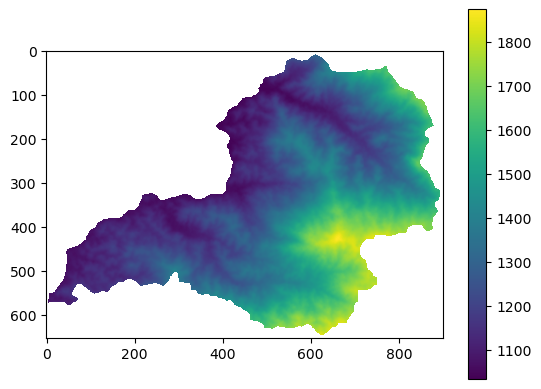

In [30]:
elevacion1 = msk*elevacion
plt.imshow(elevacion1)
plt.colorbar();

print('Forma: ', elevacion1.shape)
print('Valores únicos: ', np.unique(elevacion1))

(298006,)

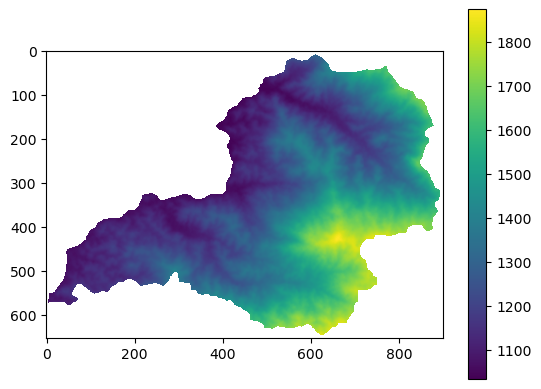

In [31]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\DEM.tif')
elevacion=raster.read(1)
elevacion=np.where(elevacion<154,np.nan,elevacion)
elevacion_vector=elevacion.ravel()
elevacion_vector_MenM=elevacion_vector[~np.isnan(elevacion_vector)]
plt.imshow(elevacion)
plt.colorbar()
elevacion_vector_MenM.shape

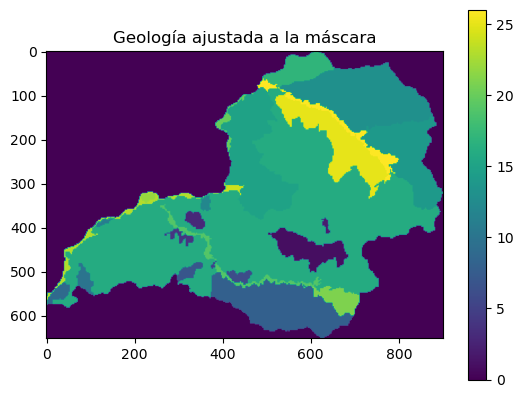

Forma: (651, 901)
Valores únicos: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26.]


In [32]:
from rasterio.enums import Resampling

# Reabrir el raster de geología
raster_geo = rio.open(r'C:\Users\Santi-PC\Documents\ArcGIS\Projects\MyProject4\UGI_PolygonToRaster1.tif')

# Leer y remuestrear la geología al tamaño de la máscara
geologia_resampleada = raster_geo.read(
    1,
    out_shape=(1, msk.shape[0], msk.shape[1]),  # adaptar a la forma de la máscara
    resampling=Resampling.nearest  # porque es un raster categórico
).squeeze()

# Aplicar la máscara
geologia_masc = geologia_resampleada * msk

# Visualizar
plt.imshow(geologia_masc)
plt.colorbar()
plt.title('Geología ajustada a la máscara')
plt.show()

# Imprimir info
print('Forma:', geologia_masc.shape)
print('Valores únicos:', np.unique(geologia_masc))

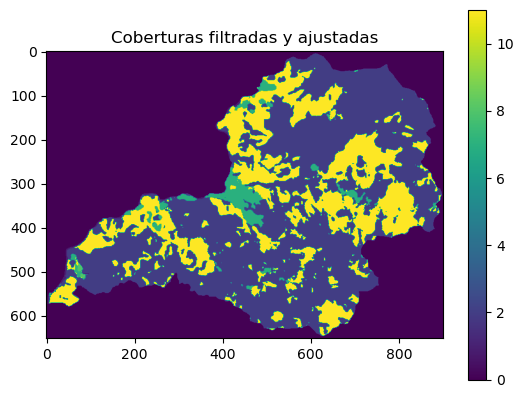

Forma final: (651, 901)
Tamaño del vector filtrado (sin NaN): (586551,)


In [33]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.enums import Resampling

# Abrir el raster de coberturas
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\Cober.tif") as rastercoberturas:
    # Resamplear al tamaño de la máscara
    coberturas_resampleadas = rastercoberturas.read(
        1,
        out_shape=(1, msk.shape[0], msk.shape[1]),  # adaptar a forma de msk
        resampling=Resampling.nearest               # porque es raster categórico
    ).squeeze()

# Reemplazar valores mayores a 100 por NaN
coberturas_resampleadas = np.where(coberturas_resampleadas > 100, np.nan, coberturas_resampleadas)

# Aplicar la máscara
coberturas_masc = coberturas_resampleadas * msk

# Aplanar y quitar NaN
coberturas_vector = coberturas_masc.ravel()
coberturas_vector_MenM = coberturas_vector[~np.isnan(coberturas_vector)]

# Visualizar
plt.imshow(coberturas_masc, cmap='viridis')
plt.colorbar()
plt.title("Coberturas filtradas y ajustadas")
plt.show()

# Imprimir info
print("Forma final:", coberturas_masc.shape)
print("Tamaño del vector filtrado (sin NaN):", coberturas_vector_MenM.shape)

In [34]:
# Convertimos matrices a vectores

inventariovector = inventario1.ravel()
print('Longitud inventariovector: ', inventariovector.shape[0])

slopevector = slope.ravel()
print('Longitud slopevector: ', slopevector.shape[0])

aspectovector = aspecto.ravel()
print('Longitud aspectovector: ', aspectovector.shape[0])

curvaturavector = curvatura1.ravel()
print('Longitud curvaturavector_vertical: ', curvaturavector.shape[0])

curvaturavectorh = curvatura2.ravel()
print('Longitud curvaturavector_horizontal: ', curvaturavectorh.shape[0])

flujovector = flujo1.ravel()
print('Longitud flujovector: ', flujovector.shape[0])

elevacionvector = elevacion1.ravel()
print('Longitud elevacionvector: ', elevacionvector.shape[0])

# Nuevas variables añadidas:
geologiavector = geologia_masc.ravel()
print('Longitud geologiavector: ', geologiavector.shape[0])

coberturasvector = coberturas_masc.ravel()
print('Longitud coberturasvector: ', coberturasvector.shape[0])

Longitud inventariovector:  586551
Longitud slopevector:  586551
Longitud aspectovector:  586551
Longitud curvaturavector_vertical:  586551
Longitud curvaturavector_horizontal:  586551
Longitud flujovector:  586551
Longitud elevacionvector:  586551
Longitud geologiavector:  586551
Longitud coberturasvector:  586551


In [35]:
import numpy as np

# Paso 1: Asegúrate de que todos los vectores estén definidos y tengan la misma forma

# Paso 2: Apilar todos los vectores en una sola matriz
stack = np.stack([
    inventariovector,
    slopevector,
    aspectovector,
    curvaturavector,
    curvaturavectorh,
    flujovector,
    elevacionvector,
    geologiavector,
    coberturasvector
], axis=1)

# Paso 3: Crear una máscara para eliminar cualquier fila con NaN
mask = ~np.any(np.isnan(stack), axis=1)

# Paso 4: Aplicar la máscara
stack_clean = stack[mask]

# Paso 5: Separar nuevamente los vectores ya limpios
inventariovectorMenM     = stack_clean[:, 0]
slopevectorMenM          = stack_clean[:, 1]
aspectovectorMenM        = stack_clean[:, 2]
curvaturavectorMenM      = stack_clean[:, 3]
curvaturavectorhMenM     = stack_clean[:, 4]
flujovectorMenM          = stack_clean[:, 5]
elevacionvectorMenM      = stack_clean[:, 6]
geologiavectorMenM       = stack_clean[:, 7]
coberturasvectorMenM     = stack_clean[:, 8]

# Resultado final
print('Longitud final (sin NaN en ninguna capa):', inventariovectorMenM.shape[0])


Longitud final (sin NaN en ninguna capa): 294242


In [36]:
#Realizamos el Dataframe

diccionario={'Inventario':inventariovectorMenM, 
             'Pendiente':slopevectorMenM, 
             'Aspectos':aspectovectorMenM, 
             'Geología':geologiavectorMenM, 
             'Cobertura':coberturasvectorMenM, 
             'Curvatura vertical':curvaturavectorMenM, 
             'curvatura horizontal': flujovectorMenM, 
             'Flujo Acumulado': curvaturavectorhMenM,
             'Elevación':elevacionvectorMenM}

df=pd.DataFrame(diccionario)
print(list(df.columns))

#tablaDatos.tail(5)

['Inventario', 'Pendiente', 'Aspectos', 'Geología', 'Cobertura', 'Curvatura vertical', 'curvatura horizontal', 'Flujo Acumulado', 'Elevación']


In [37]:
df.head()

,Inventario,Pendiente,Aspectos,Geología,Cobertura,Curvatura vertical,curvatura horizontal,Flujo Acumulado,Elevación
0,0.0,0.000000,0.000000,17.0,0.0,-0.512,0.000000,0.128,1321.0
1,0.0,0.000000,0.000000,17.0,2.0,1.280,0.693147,-0.000,1319.0
2,0.0,0.000000,0.000000,17.0,2.0,-0.640,0.693147,-0.000,1320.0
3,0.0,0.000000,0.000000,17.0,2.0,-1.280,0.000000,0.640,1322.0
4,0.0,7.462078,104.743561,17.0,2.0,-2.016,0.000000,1.824,1322.0


In [38]:
# Clasificación de la variable Elevación
condiciones_elevacion = [
    (df['Elevación'] >= 800) & (df['Elevación'] < 1180),
    (df['Elevación'] >= 1180) & (df['Elevación'] < 1725),
    (df['Elevación'] >= 1725) & (df['Elevación'] <= 2000)
]

# Valores numéricos: 1 = Bajo, 2 = Alto, 3 = Muy bajo
valores_elevacion = [1, 2, 3]

# Crear la columna reclasificada
df['Elevacion_reclas'] = np.select(condiciones_elevacion, valores_elevacion, default=np.nan)



In [39]:
# Función para construir matriz 2x2
def construir_matriz(df, columna_reclas, clase_objetivo):
    es_objetivo = df[columna_reclas] == clase_objetivo
    no_objetivo = (df[columna_reclas] != clase_objetivo) & (~df[columna_reclas].isna())
    inventario_si = df['Inventario'] == 1
    inventario_no = df['Inventario'] == 0

    a = ((es_objetivo) & (inventario_si)).sum()
    b = ((no_objetivo) & (inventario_si)).sum()
    c = ((es_objetivo) & (inventario_no)).sum()
    d = ((no_objetivo) & (inventario_no)).sum()

    return pd.DataFrame({
        f'{columna_reclas} = {clase_objetivo}': [a, c],
        f'{columna_reclas} ≠ {clase_objetivo}': [b, d]
    }, index=['Inventario = sí', 'Inventario = no'])

# Lista de clases para elevación
clases_elevacion = [1, 2, 3]  # 1: Bajo, 2: Alto, 3: Muy bajo

# Mostrar matrices para cada clase
for clase in clases_elevacion:
    print(f'\n📊 Matriz para clase: {clase} en Elevacion_reclas')
    matriz = construir_matriz(df, 'Elevacion_reclas', clase_objetivo=clase)
    print(matriz)



📊 Matriz para clase: 1 en Elevacion_reclas
                 Elevacion_reclas = 1  Elevacion_reclas ≠ 1
Inventario = sí                  3828                  6024
Inventario = no                 75604                208786

📊 Matriz para clase: 2 en Elevacion_reclas
                 Elevacion_reclas = 2  Elevacion_reclas ≠ 2
Inventario = sí                  5365                  4487
Inventario = no                193465                 90925

📊 Matriz para clase: 3 en Elevacion_reclas
                 Elevacion_reclas = 3  Elevacion_reclas ≠ 3
Inventario = sí                   659                  9193
Inventario = no                 15321                269069


In [40]:
# Clasificación de la curvatura horizontal
condiciones_curv = [
    (df['curvatura horizontal'] >= -0.2) & (df['curvatura horizontal'] < 0.4),
    (df['curvatura horizontal'] >= 0.4) & (df['curvatura horizontal'] < 2.6),
    (df['curvatura horizontal'] >= 2.6) & (df['curvatura horizontal'] <= 10)
]

# Valores numéricos: 1 = Alto, 2 = Intermedio, 3 = Bajo
valores_curv = [1, 2, 3]

# Crear la nueva columna
df['CurvaturaHor_reclas'] = np.select(condiciones_curv, valores_curv, default=np.nan)



In [41]:
# Función para construir matriz 2x2 (ya definida antes)
def construir_matriz(df, columna_reclas, clase_objetivo):
    es_objetivo = df[columna_reclas] == clase_objetivo
    no_objetivo = (df[columna_reclas] != clase_objetivo) & (~df[columna_reclas].isna())
    inventario_si = df['Inventario'] == 1
    inventario_no = df['Inventario'] == 0

    a = ((es_objetivo) & (inventario_si)).sum()
    b = ((no_objetivo) & (inventario_si)).sum()
    c = ((es_objetivo) & (inventario_no)).sum()
    d = ((no_objetivo) & (inventario_no)).sum()

    return pd.DataFrame({
        f'{columna_reclas} = {clase_objetivo}': [a, c],
        f'{columna_reclas} ≠ {clase_objetivo}': [b, d]
    }, index=['Inventario = sí', 'Inventario = no'])
# Lista de clases de curvatura horizontal
clases_curv = [1, 2, 3]  # 1: Alto, 2: Intermedio, 3: Bajo

# Mostrar matrices para cada clase
for clase in clases_curv:
    print(f'\n📊 Matriz para clase: {clase} en CurvaturaHor_reclas')
    matriz = construir_matriz(df, 'CurvaturaHor_reclas', clase_objetivo=clase)
    print(matriz)



📊 Matriz para clase: 1 en CurvaturaHor_reclas
                 CurvaturaHor_reclas = 1  CurvaturaHor_reclas ≠ 1
Inventario = sí                     1344                     8508
Inventario = no                    52347                   232043

📊 Matriz para clase: 2 en CurvaturaHor_reclas
                 CurvaturaHor_reclas = 2  CurvaturaHor_reclas ≠ 2
Inventario = sí                     6117                     3735
Inventario = no                   175682                   108708

📊 Matriz para clase: 3 en CurvaturaHor_reclas
                 CurvaturaHor_reclas = 3  CurvaturaHor_reclas ≠ 3
Inventario = sí                     2391                     7461
Inventario = no                    56361                   228029


In [46]:
# Definir condiciones para los rangos de aspectos
condiciones = [
    ((df['Aspectos'] >= 0) & (df['Aspectos'] < 120)),       # Intermedio
    ((df['Aspectos'] >= 120) & (df['Aspectos'] < 255)),     # Bajo
    ((df['Aspectos'] >= 255) & (df['Aspectos'] <= 360))     # Alto
]

# Etiquetas
valores = ['Intermedio', 'Bajo', 'Alto']

# Crear nueva columna en el DataFrame
df['Aspectos_reclas'] = np.select(condiciones, valores, default=np.nan)

# Verificar algunas filas
df[['Aspectos', 'Aspectos_reclas']].head()


,Aspectos,Aspectos_reclas
0,0.000000,Intermedio
1,0.000000,Intermedio
2,0.000000,Intermedio
3,0.000000,Intermedio
4,104.743561,Intermedio


In [47]:
import numpy as np
import pandas as pd

# Función para construir matriz 2x2 para una clase dada
def construir_matriz(df, columna_reclas, clase_objetivo):
    es_objetivo = df[columna_reclas] == clase_objetivo
    no_objetivo = (df[columna_reclas] != clase_objetivo) & (~df[columna_reclas].isna())
    inventario_si = df['Inventario'] == 1
    inventario_no = df['Inventario'] == 0

    a = ((es_objetivo) & (inventario_si)).sum()
    b = ((no_objetivo) & (inventario_si)).sum()
    c = ((es_objetivo) & (inventario_no)).sum()
    d = ((no_objetivo) & (inventario_no)).sum()

    return pd.DataFrame({
        f'{columna_reclas} = {clase_objetivo}': [a, c],
        f'{columna_reclas} ≠ {clase_objetivo}': [b, d]
    }, index=['Inventario = sí', 'Inventario = no'])

# Lista de clases presentes en la columna de aspectos reclasificada
clases_aspectos = df['Aspectos_reclas'].dropna().unique()

# Generar y mostrar matrices para cada clase
for clase in clases_aspectos:
    print(f'\n📊 Matriz para clase: {clase} en Aspectos_reclas')
    matriz = construir_matriz(df, 'Aspectos_reclas', clase_objetivo=clase)
    print(matriz)



📊 Matriz para clase: Intermedio en Aspectos_reclas
                 Aspectos_reclas = Intermedio  Aspectos_reclas ≠ Intermedio
Inventario = sí                          2324                          7528
Inventario = no                         74707                        209683

📊 Matriz para clase: Bajo en Aspectos_reclas
                 Aspectos_reclas = Bajo  Aspectos_reclas ≠ Bajo
Inventario = sí                    4136                    5716
Inventario = no                   88281                  196109

📊 Matriz para clase: Alto en Aspectos_reclas
                 Aspectos_reclas = Alto  Aspectos_reclas ≠ Alto
Inventario = sí                    3392                    6460
Inventario = no                  121402                  162988


In [48]:
# Definir condiciones para los rangos de pendiente
condiciones = [
    (df['Pendiente'] >= 0) & (df['Pendiente'] < 23),    # Alta
    (df['Pendiente'] >= 23) & (df['Pendiente'] <= 70)   # Baja
]

# Etiquetas
valores = ['Alta', 'Baja']

# Crear nueva columna en el DataFrame
df['Pendiente_reclas'] = np.select(condiciones, valores, default=np.nan)

# Verificar algunas filas
df[['Pendiente', 'Pendiente_reclas']].head()

,Pendiente,Pendiente_reclas
0,0.000000,Alta
1,0.000000,Alta
2,0.000000,Alta
3,0.000000,Alta
4,7.462078,Alta


In [49]:
import numpy as np
import pandas as pd

# Función para construir matriz 2x2 para una clase dada
def construir_matriz(df, columna_reclas, clase_objetivo):
    es_objetivo = df[columna_reclas] == clase_objetivo
    no_objetivo = (df[columna_reclas] != clase_objetivo) & (~df[columna_reclas].isna())
    inventario_si = df['Inventario'] == 1
    inventario_no = df['Inventario'] == 0

    a = ((es_objetivo) & (inventario_si)).sum()
    b = ((no_objetivo) & (inventario_si)).sum()
    c = ((es_objetivo) & (inventario_no)).sum()
    d = ((no_objetivo) & (inventario_no)).sum()

    return pd.DataFrame({
        f'{columna_reclas} = {clase_objetivo}': [a, c],
        f'{columna_reclas} ≠ {clase_objetivo}': [b, d]
    }, index=['Inventario = sí', 'Inventario = no'])

# Lista de clases presentes en la columna de pendiente reclasificada
clases_pendiente = df['Pendiente_reclas'].dropna().unique()

# Generar y mostrar matrices para cada clase
for clase in clases_pendiente:
    print(f'\n📊 Matriz para clase: {clase} en Pendiente_reclas')
    matriz = construir_matriz(df, 'Pendiente_reclas', clase_objetivo=clase)
    print(matriz)


📊 Matriz para clase: Alta en Pendiente_reclas
                 Pendiente_reclas = Alta  Pendiente_reclas ≠ Alta
Inventario = sí                     5846                     4006
Inventario = no                   199701                    84689

📊 Matriz para clase: Baja en Pendiente_reclas
                 Pendiente_reclas = Baja  Pendiente_reclas ≠ Baja
Inventario = sí                     4006                     5846
Inventario = no                    84689                   199701


In [50]:
import numpy as np

# Definir condiciones para los rangos de pendiente
condiciones_pendiente = [
    (df['Pendiente'] >= 0) & (df['Pendiente'] <= 5),      # Bajo
    (df['Pendiente'] > 5) & (df['Pendiente'] <= 15),      # Medio
    (df['Pendiente'] > 15) & (df['Pendiente'] <= 30),     # Alto
    (df['Pendiente'] > 30) & (df['Pendiente'] <= 90)      # Muy alto
]

# Etiquetas en texto
valores_pendiente = ['Bajo', 'Medio', 'Alto', 'Muy alto']

# Crear nueva columna en el DataFrame
df['Pendiente_reclas'] = np.select(condiciones_pendiente, valores_pendiente, default=np.nan)

# Verificar algunas filas
df[['Pendiente', 'Pendiente_reclas']].head()


,Pendiente,Pendiente_reclas
0,0.000000,Bajo
1,0.000000,Bajo
2,0.000000,Bajo
3,0.000000,Bajo
4,7.462078,Medio


In [51]:
import pandas as pd

# Función para construir matriz 2x2
def construir_matriz(df, columna_reclas, clase_objetivo):
    es_objetivo = df[columna_reclas] == clase_objetivo
    no_objetivo = (df[columna_reclas] != clase_objetivo) & (~df[columna_reclas].isna())
    inventario_si = df['Inventario'] == 1
    inventario_no = df['Inventario'] == 0

    a = ((es_objetivo) & (inventario_si)).sum()
    b = ((no_objetivo) & (inventario_si)).sum()
    c = ((es_objetivo) & (inventario_no)).sum()
    d = ((no_objetivo) & (inventario_no)).sum()

    return pd.DataFrame({
        f'{columna_reclas} = {clase_objetivo}': [a, c],
        f'{columna_reclas} ≠ {clase_objetivo}': [b, d]
    }, index=['Inventario = sí', 'Inventario = no'])

# Lista de clases presentes en Pendiente_reclas
clases_pendiente = df['Pendiente_reclas'].dropna().unique()

# Mostrar matrices para cada clase
for clase in clases_pendiente:
    print(f'\n📊 Matriz para clase: {clase} en Pendiente_reclas')
    matriz = construir_matriz(df, 'Pendiente_reclas', clase_objetivo=clase)
    print(matriz)



📊 Matriz para clase: Bajo en Pendiente_reclas
                 Pendiente_reclas = Bajo  Pendiente_reclas ≠ Bajo
Inventario = sí                      174                     9678
Inventario = no                    10730                   273660

📊 Matriz para clase: Medio en Pendiente_reclas
                 Pendiente_reclas = Medio  Pendiente_reclas ≠ Medio
Inventario = sí                      2070                      7782
Inventario = no                     76065                    208325

📊 Matriz para clase: Alto en Pendiente_reclas
                 Pendiente_reclas = Alto  Pendiente_reclas ≠ Alto
Inventario = sí                     6384                     3468
Inventario = no                   178009                   106381

📊 Matriz para clase: Muy alto en Pendiente_reclas
                 Pendiente_reclas = Muy alto  Pendiente_reclas ≠ Muy alto
Inventario = sí                         1224                         8628
Inventario = no                        19586               